
# Random Over-sampling with Smoothing
Machine Learning with Imbalanced Data - Course

In order not to DUPLICATE the data, after extracting the samples at random, we multiply the value of the sample by a number that contemplates the dispersion of the data, to obtain artificial examples.

For this functionality, make sure you have imbalanced-learn version 0.8.0 or bigger installed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Create data
We will create 2 classes, one majority and one minority, clearly separated to facilitate the demo.

In [2]:
# configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pd formats
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# create an imbalanced X set
X = pd.concat([
    X[y==0],
    X[y==1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [3]:
X.head()

,varA,varB
0,-1.441879,0.434822
2,3.121936,-1.479051
3,1.008248,-0.216713
4,-0.188425,-1.887906
8,-1.127712,0.254553


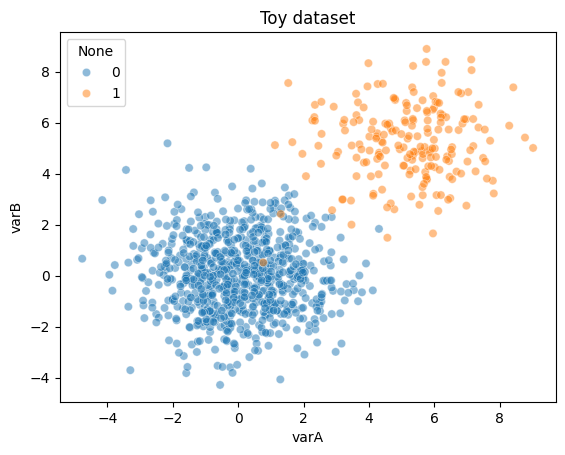

In [4]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random oversampling with smoothing

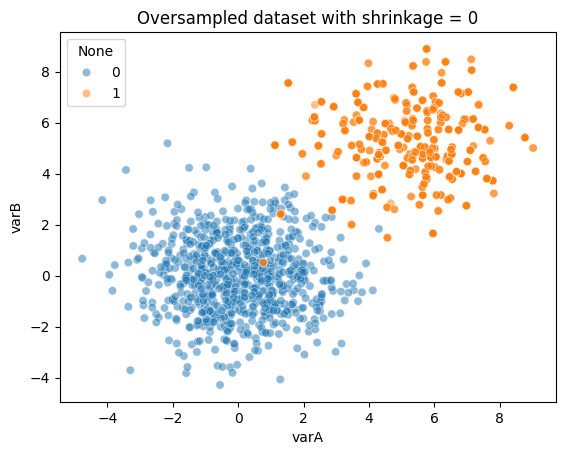

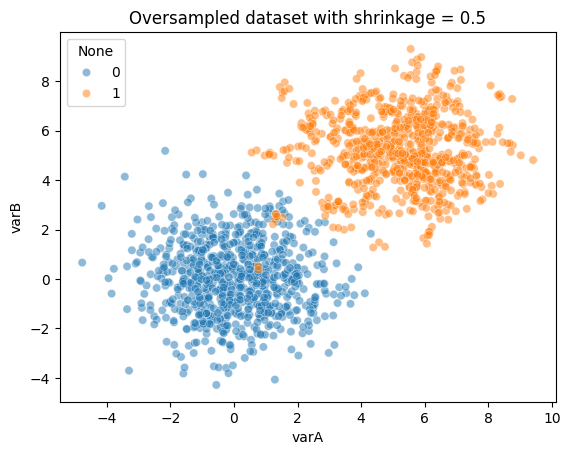

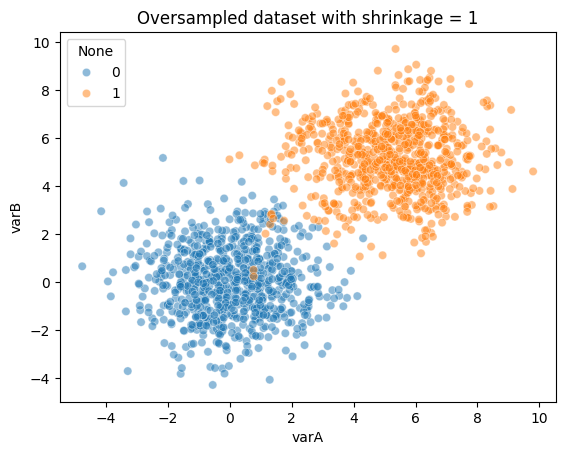

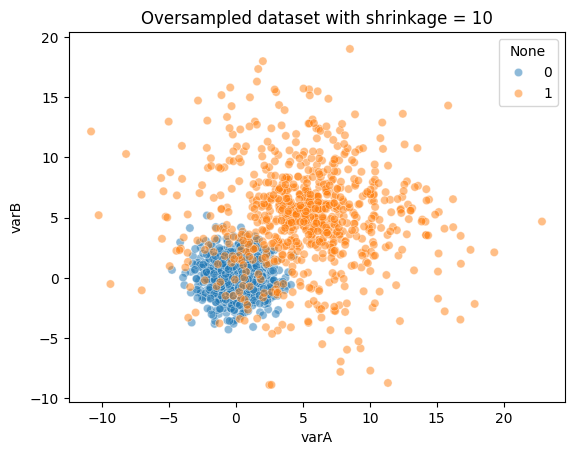

In [5]:
for shrink in [0, 0.5, 1, 10]:
    ros = RandomOverSampler(
        sampling_strategy='auto',   # samples only the minority class
        random_state=0,
        shrinkage=shrink,
    )

    X_res, y_res = ros.fit_resample(X, y)

    # plot resampled data
    sns.scatterplot(
        data=X_res, x='varA', y='varB', hue=y_res, alpha=0.5,
    )

    plt.title('Oversampled dataset with shrinkage = {}'.format(shrink))
    plt.show()

The bigger the shrinkage the more far away from the center of the distribution the samples are created.

## Multiclass

### Create data

In [6]:
# create some toy data
# configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), (-1, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pd formats
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# create an imbalanced X set
X = pd.concat([
    X[y==0],
    X[y==1].sample(100, random_state=42),
    X[y==2].sample(100, random_state=42),
], axis=0)

y = y.loc[X.index]

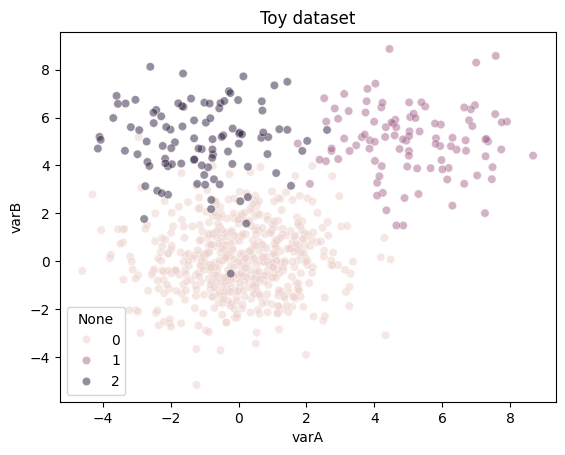

In [7]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5,
)

plt.title('Toy dataset')
plt.show()

In [8]:
y.value_counts()

0    534
1    100
2    100
Name: count, dtype: int64

### Oversampling

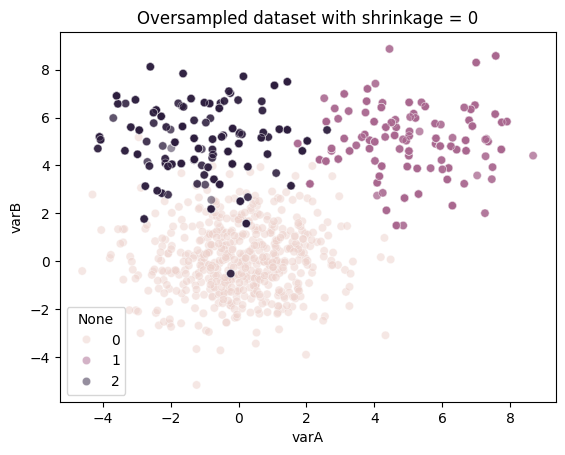

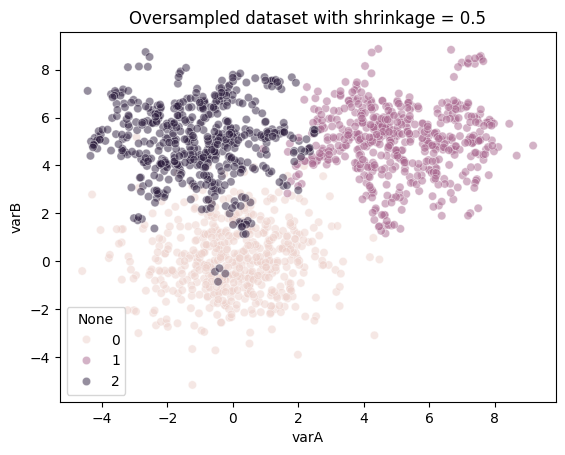

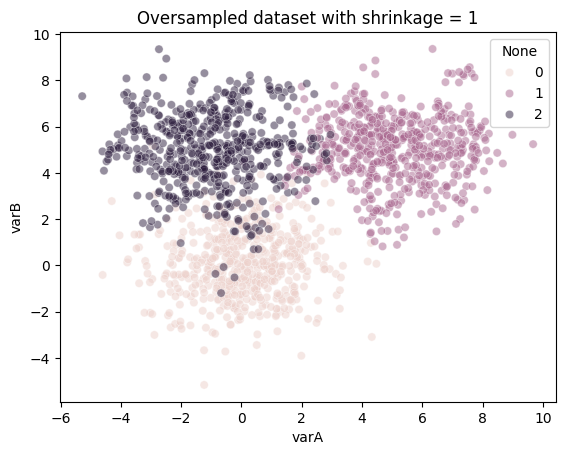

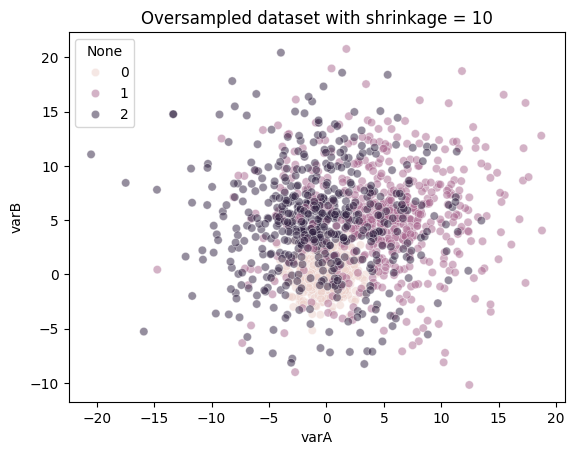

In [9]:
for shrink in [0, 0.5, 1, 10]:
    ros = RandomOverSampler(
        sampling_strategy='not majority',   # samples all but majority class
        random_state=0,
        shrinkage=shrink,
    )

    X_res, y_res = ros.fit_resample(X, y)

    # plot resampled data
    sns.scatterplot(
        data=X_res, x='varA', y='varB', hue=y_res, alpha=0.5,
    )

    plt.title('Oversampled dataset with shrinkage = {}'.format(shrink))
    plt.show()

In [10]:
y_res.value_counts()

0    534
1    534
2    534
Name: count, dtype: int64

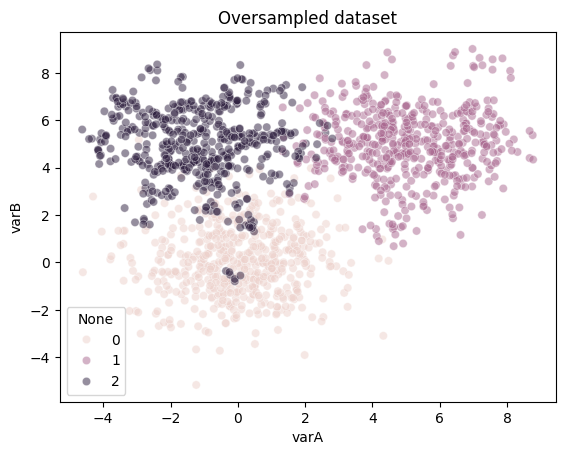

In [11]:
# we can also specify different shrinkage for different classes
ros = RandomOverSampler(
    sampling_strategy={1:500, 2:500},
    random_state=0,
    shrinkage={1:1, 2:0.5},
)

X_res, y_res = ros.fit_resample(X, y)

# plot resampled data
sns.scatterplot(
    data=X_res, x='varA', y='varB', hue=y_res, alpha=0.5,
)

plt.title('Oversampled dataset')
plt.show()

In [12]:
y_res.value_counts()

0    534
1    500
2    500
Name: count, dtype: int64